<a href="https://colab.research.google.com/github/RLopez112/CoderEntregaDS/blob/main/Segunda_pre_entrega_proyecto_final_Alonso%2C_Braian_Lopez%2C_Rodrigo_Sanchez%2C_Axel_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

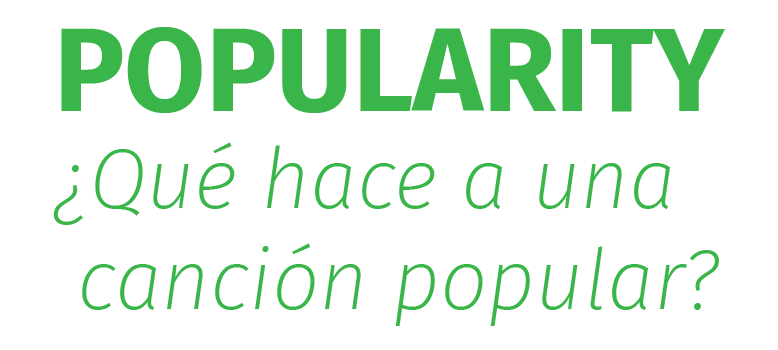

#IMPORTACIONES

In [46]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
import seaborn as sns #############

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

!pip install pingouin
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer #imputar valores nulos
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px

import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#CONTEXTO COMERCIAL


Estamos trabajando para un productor musical latino que está buscando su nuevo hit. Como el mercado es extremadamente competitivo necesita una guía sobre que tipo de canción será mejor recibida.
Para así reducir el riesgo de la inversión.

La producción musical es una industria impulsada por la creatividad, pero con los avances en la tecnología, ahora hay una oportunidad de incorporar ideas basadas en datos en el proceso creativo. Al aprovechar los algoritmos de aprendizaje automático, podemos analizar grandes conjuntos de datos de pistas de música populares y extraer características clave que son comunes entre las pistas exitosas. Estas características podrían incluir cosas como el tempo, las progresiones de acordes, las letras e incluso el estado de ánimo de la pista.

Al combinar la creatividad del productor con el poder analítico del aprendizaje automático, podemos llegar a un mejor resultado.


Actualmente existen varias plataformas donde podemos monetizar canciones. 

**Los más populares**
*   Spotify
*   Apple Music
*   Qobuz
*   Tidal
*   Amazon Music

Dentro de esta selección nos parece que la mejor fuente de información es Spotify. Porque nos parece que es la más popular

El dataset que utilizaremos tiene 20 columnas y 114.000 filas.
Cada fila corresponde a una canción

Y las variables que tenemos de cada canción son:

**Variables:**

*   track_id: El ID de la canción en Spotify.

*   artist: Los nombres de los artistas que han interpretado la canción. Si hay más de un artista, se separan con un ;.

*   album_name: El nombre del álbum en el que aparece la canción.

*   track_name: El nombre de la canción.

*   popularity : La popularidad de una pista es un valor entre 0 y 100, siendo 100 la más popular. La popularidad se calcula mediante un algoritmo y se basa, principalmente, en el número total de reproducciones que ha tenido la canción y en lo recientes que son esas reproducciones. Por lo general, las canciones que se reproducen mucho ahora tienen una mayor popularidad que las que se reprodujeron mucho en el pasado. Las canciones duplicadas (por ejemplo, la misma canción de un single y de un álbum) se califican de forma independiente. La popularidad del artista y del álbum se deriva matemáticamente de la popularidad de la canción.

*   duration_ms: La duración de la canción en milisegundos.

*   explícit: Si la pista tiene o no una letra explícita (verdadero = sí la tiene; falso = no la tiene O desconocido).

*   danceability: La Danceability describe lo adecuada que es una pista para bailar basándose en una combinación de elementos musicales que incluyen el tempo, la estabilidad del ritmo, la fuerza del compás y la regularidad general. Un valor de 0,0 es el menos bailable y 1,0 es el más bailable.

*   Energy (energía): La energía es una medida de 0,0 a 1,0 y representa una medida perceptiva de intensidad y actividad. Por lo general, las pistas energéticas son rápidas, ruidosas y con mucho ruido. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene una puntuación baja en la escala

*   key (clave): El tono en el que se encuentra la pista. Los números enteros se asignan a los tonos utilizando la notación estándar de la clase de tono. Por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detecta ninguna tonalidad, el valor es -1.

*   loudness (sonoridad): La sonoridad general de una pista en decibelios (dB).

*   Mode (modo): El modo indica la modalidad (mayor o menor) de una pista, el tipo de escala del que se deriva su contenido melódico. La mayor se representa con 1 y la menor con 0.

*   Speechiness(locuacidad): La locuacidad detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente hablada sea la grabación (por ejemplo, un programa de entrevistas, un audiolibro o una poesía), más se acercará a 1,0 el valor del atributo. Los valores superiores a 0,66 describen pistas que probablemente estén compuestas exclusivamente por palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener tanto música como voz, ya sea en secciones o en capas, incluyendo casos como la música rap. Los valores por debajo de 0,33 representan probablemente música y otras pistas no habladas.

*   acousticness(acústica): Una medida de confianza de 0,0 a 1,0 sobre si la pista es acústica. 1,0 representa una confianza alta en que la pista es acústica.

*   instrumental (instrumentalidad): Predice si una pista no contiene voces. Los sonidos "Ooh" y "aah" se consideran instrumentales en este contexto. Las pistas de rap o de palabras habladas son claramente "vocales". Cuanto más se acerque el valor de instrumentalización a 1,0, mayor será la probabilidad de que la pista no tenga contenido vocal.

*   liveness(intensidad): Detecta la presencia de público en la grabación. Los valores más altos de liveness representan una mayor probabilidad de que la pista se haya interpretado en directo. Un valor superior a 0,8 proporciona una fuerte probabilidad de que la pista sea en directo.

*   valence (valencia): Una medida de 0,0 a 1,0 que describe la positividad musical que transmite una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, tristes, deprimidas, enfadadas).

*   tempo: El tempo global estimado de una pista en pulsaciones por minuto (BPM). En la terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración media del compás.

*   time_signature(compás): Un compás estimado. El compás es una convención de notación para especificar cuántos tiempos hay en cada compás. La signatura de tiempo va de 3 a 7, indicando signaturas de tiempo de 3/4, a 7/4.

*   Track_genre : El género al que pertenece la pista.





In [3]:
from google.colab import drive 

drive.mount('/content/gdrive') 

spotify= pd.read_csv('/content/gdrive/MyDrive/coderhouse/dataset_spotify.csv',sep=',')

# Maharshi Pandya. (2022). <i>🎹 Spotify Tracks Dataset</i> [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/4372070
# Fecha dataset. 22 Octubre 2022 

Mounted at /content/gdrive


#ANÁLISIS EXPLORATORIO

## ANALISIS EXPLORATORIO DE POPULARIDAD

Como lo que queremos predecir es si una canción es popular o no. Lo primero que vamos a estudiar es como son de populares las canciones en este dataset

popularity : La popularidad de una pista es un valor entre 0 y 100, siendo 100 la más popular. La popularidad se calcula mediante un algoritmo y se basa, principalmente, en el número total de reproducciones que ha tenido la canción y en lo recientes que son esas reproducciones. Por lo general, las canciones que se reproducen mucho ahora tienen una mayor popularidad que las que se reprodujeron mucho en el pasado. Las canciones duplicadas (por ejemplo, la misma canción de un single y de un álbum) se califican de forma independiente. La popularidad del artista y del álbum se deriva matemáticamente de la popularidad de la canción.

In [4]:
fig = px.histogram(spotify, x=spotify['popularity'],title="Distribución de popularidad").update_traces(marker=dict(color='limegreen'))
fig.show()

In [5]:
nopop = spotify[spotify.popularity==0]
nopop = nopop[['artists','track_name']]
head50=nopop.groupby('artists').count().sort_values(by=['track_name'],ascending=False).head(50)
head5=nopop.groupby('artists').count().sort_values(by=['track_name'],ascending=False).head(5)
nopop

,artists,track_name
23,Jason Mraz,93 Million Miles
24,Jason Mraz,Unlonely
26,Jason Mraz,Winter Wonderland
27,Jason Mraz,If It Kills Me
28,Jason Mraz,Winter Wonderland
...,...,...
113046,Rend Collective,Ding Dong Merrily On High (The Celebration's S...
113047,Kim Walker-Smith,Rudolph The Red-Nosed Reindeer
113048,Kim Walker-Smith,I'll Be Home For Christmas
113049,Rend Collective;We The Kingdom,God Rest Ye Merry Gentlemen (Hallelujah)


In [6]:
nopop[nopop['artists']=='Don Omar']

,artists,track_name
51947,Don Omar,Guaya Guaya
51948,Don Omar,Guaya Guaya
51949,Don Omar,Guaya Guaya
51966,Don Omar,Guaya Guaya
51969,Don Omar,Bomba
...,...,...
89393,Don Omar,Guaya Guaya
89394,Don Omar,Dile
89398,Don Omar,Dale Don Dale
89434,Don Omar,Salió El Sol


In [7]:
arfig = px.histogram(head50,x=head50.index,y=head50.track_name,title="Cantidad de canciones por artista con popularidad 0").update_traces(marker=dict(color='limegreen'))
arfig.update_xaxes(tickangle=-45)
arfig.show()

Hay una gran concentración de canciones con popularidad 0 en el dataset. Vemos que algunas canciones con popularidad 0 están duplicadas. Y algunas de ellas son consideradas como "Populares" como "Guaya Guaya" de Don Omar. Que, segun https://musicstax.com/ tiene una popularidad de 73% 
Mantendremos esas canciones duplicadas porque creemos que, si de verdad son populares, será tenida en cuenta en el análisis.

In [8]:
fig = px.box(spotify,y=spotify['popularity'],width=400,title='Boxplot popularidad').update_traces(marker=dict(color='limegreen'))

fig.update_layout(xaxis=dict(title_text='POPULARITY'))
fig.show()

En la gráfica de caja y bigotes vemos que la media de la mediana de popularidad está por debajo de 40. Lo que nos podría llevar a pensar que el repertorio de música no está bien aceptado. O que se está incluyendo canciones que no se escuchan.
Y vemos que la distribucion tiene asimetria hacia la izquierda. Tambien podemos notar que el punto de mayor densidad se encuentra alrededor del 0. (obervacion: hablamos del punto alrededor del 0 y no puntualmente en el 0 dado a que la probabilidad de un punto en una funcion continua es 0).

Nuestro cliente quiere que su canción compita en los charts. Por eso creemos acertado decir que, para poder competir en los charts debería estar el en cuartíl superior. 

Pero, ¿que tan populares son las canciones en el cuartíl superior?

In [9]:
spotify['popularity'].describe()

count    114000.000000
mean         33.238535
std          22.305078
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

El cuartíl superior tiene una popularidad mínima de 50 llegando hasta 100.
Por lo que vamos a estudiar ese cuartil en más profundidad

## ANALISIS EXPLORATORIO DEL CUARTIL SUPERIOR DE POPULARIDAD

In [10]:
popularity_100 = spotify.copy().sort_values(by=["popularity"], ascending=False)[["popularity","track_name","artists","energy","danceability"]][0:100]  #las 100 canciones con mayor valoracion

spotify_popularity = spotify[spotify.popularity>=50]
spotify["valoracion"] = np.where(spotify["popularity"]>=50, "positva", "negativa")

popularity_100 = spotify.copy().sort_values(by=["popularity"], ascending=False)[["popularity","track_name","artists","energy","danceability", "valoracion"]][0:100]

popu_spotify =  spotify[["popularity","track_name","artists","energy","danceability", "valoracion","loudness", "explicit"]]

In [11]:
spotify['duration_ms']=spotify['duration_ms']/1000/60 #PASO DURACION A MINUTOS

spotify = spotify.drop(['Unnamed: 0'], axis='columns') 

mostPopularSongs = spotify[spotify['popularity']>50]

Ahora que ya tenemos el cuartil superior de popularidad. 
¿Existe alguna correlación entre las variables que explique la popularidad?

In [56]:
df_corr=spotify.corr().round(2)
fig = px.imshow(df_corr, text_auto=True, height=900, width=1200,color_continuous_scale='Tealgrn')
fig.show()

**Interpretando las relaciones con Popularidad, observamos que no hay nada de relacion con ninguna de las variables**

También, Podemos observar una relacion positiva entre las variables :
* Loudness y Danceability, 
* Energy y Danceablity,
* Energy y Loduness . 

Por lo cual, mientras mas alta o ruidosa es la cancion, más energia conlleva.



Como la energía y el volúmen de las canciones son las variables que están más relacionadas. Nos parecio interesante ver como la popularidad respondía a esa relación.


In [14]:
fig = px.scatter(mostPopularSongs, x="loudness", y="popularity",color='energy',color_continuous_scale='Tealgrn')
fig.show()

In [15]:

fig = px.scatter(mostPopularSongs, x="danceability", y="popularity",color='energy',color_continuous_scale='Tealgrn')
fig.show()

In [16]:
fig = px.scatter(mostPopularSongs, x="duration_ms", y="popularity",color='energy',color_continuous_scale='Tealgrn')
fig.show()

Con las gráficas anteriors vemos que la bailabilidad no está directamente ligada a la energía. Y vemos casos de gran popularidad que la bailabilidad es muy alta pero la energía es muy baja. 

Se podría deducir que las canciones más populares son ruidosas. Vemos que hay canciones que tiene muy buena aceptación que tiene un volumen bajo. Pero no hay canciones extremadamente populares en el extremo más ruidoso.

Vemos que no hay correlaciones entre ninguna característica de la cancion con el resultado comercial de la misma. 
Pero, ¿hay alguna diferencia que resalte entre las canciones más populares y el resto de canciones?

In [17]:
## ARIEL. EN ESTA GRÁFICA QUISE HACER UN GROUPED BAR CHART PERO EL VALOR DE POPULARIDAD Y TEMPO LA DEJABAN FEA
## ¿CUÁL ES LA MEJOR? ¿NORMALIZAR DATOS O USAR LA COLUMNA DIFFERENCE (ES EN PORCENTAJE)?

medianDifference = pd.DataFrame(columns=['popular','average','difference'])
medianDifference['popular']=mostPopularSongs.median().round(2)
medianDifference['average']=spotify.median().round(2)
medianDifference['difference']=((medianDifference['popular']/medianDifference['average']-1)*100).round(2)
medianDifference

,popular,average,difference
popularity,60.00,35.00,71.43
duration_ms,3.51,3.55,-1.13
explicit,0.00,0.00,NaN
danceability,0.59,0.58,1.72
energy,0.67,0.68,-1.47
key,5.00,5.00,0.00
loudness,-6.67,-7.00,-4.71
mode,1.00,1.00,0.00
speechiness,0.05,0.05,0.00
acousticness,0.16,0.17,-5.88


In [47]:
fig = go.Figure()
medianDifference=medianDifference.drop('explicit')
fig.add_trace(go.Bar(x=medianDifference.index,y=medianDifference['average'], name='Average',marker_color='grey'))
fig.add_trace(go.Bar(x=medianDifference.index,y=medianDifference['popular'], name='Popular',marker_color='limegreen'))
fig.update_xaxes(tickangle=-45)

Comparando las medias de todos los campos de las canciones más populares y las medias del dataset general. Vemos que no exiten grandes diferencias entre ellas.

Las diferencias más notorias son en "liveness", "acousticness","valence" y "loudness" Siendo "liveness","valence" y "acousticness" más bajas en las más populares. Pero menos de 10%

La diferencia es mínima. Por lo que podemos asumir que estos valores por si solos no son definitorios para la popularidad de la cancion

## ANÁLISIS EXPLORATORIO DEL CUARTIL SUPOERIOR DE POPULARIDAD POR EXPLÍCITO

En la tabla anterior vimos que la variable "explicit" daba valores nulos. Por eso vamos a estudiar esa característica con un poco más de detalle

In [55]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`

fig = px.pie(mostPopularSongs, values=mostPopularSongs.groupby('explicit').size(),names =mostPopularSongs.groupby('explicit').sum().index,color_discrete_sequence=px.colors.sequential.Tealgrn,height=750,width=750,title='Porcentaje de canciones con contenido explícito')
fig.show()

In [45]:
fig = px.box(spotify,x=spotify['explicit'],y=spotify['popularity'],width=800,title='Boxplot popularidad segun contenido explícito').update_traces(marker=dict(color='limegreen'))

fig.update_layout(xaxis=dict(title_text='POPULARITY'))
fig.show()

Vemos que más de un 85% de las canciones del cuartil superior de popularidad no tienen lenguaje explícito.
Sin embargo, las canciones con lenguaje explícito parecen ser más populares.

## ANÁLISIS EXPLORATORIO POR GÉNERO

Para que nuestra recomendación sea mas concreta. Podemos estudiar que géneros son los más populares. Para así generar una canción de ese género, asumiendo que va a tener una mediana de popularidad mayor al resto.

In [25]:
spotify['track_genre_cat'] =  spotify['track_genre'].astype('category')
spotify['track_genre_cat'] = spotify['track_genre_cat'].cat.codes
spotify.groupby('track_genre_cat')

import plotly.express as px
#data_canada = px.data.gapminder().query("country == 'Canada'")



popularityByTrackGenre = spotify[['track_genre_cat','popularity','track_genre']].groupby('track_genre_cat').median()


# sns.barplot(popularityByTrackGenre.index,popularityByTrackGenre['popularity'])


genderNames=spotify.groupby('track_genre').median().index
# N=114
# ind = np.arange(N) 




fig = px.bar(popularityByTrackGenre,x=genderNames,y=popularityByTrackGenre['popularity']).update_traces(marker=dict(color='limegreen'))
fig.update_layout(barmode='stack')
fig.update_xaxes(categoryorder='total descending')
fig.update_xaxes(tickangle=-45)
fig.show()


Como el valor mínimo de popularidad es 50. Vamos a ver que géneros tienen una media de popularidad de 50

In [26]:
popularGenres=popularityByTrackGenre[popularityByTrackGenre['popularity']>50].index 



In [27]:
print("Most popular genres",popularGenres.size)
print("Quantity of genres",spotify.groupby('track_genre').size().index.size)
print(popularGenres.size/spotify.groupby('track_genre').size().index.size)

Most popular genres 13
Quantity of genres 114
0.11403508771929824


In [28]:
popularityByTrackGenre[popularityByTrackGenre['popularity']>60]
popularGenres=popularityByTrackGenre[popularityByTrackGenre['popularity']>60].index 
for i in popularGenres:
  print(spotify.groupby('track_genre').size().index[i])


pop


Se ve que la cantidad de géneros que tienen una media de popularidad mayor a 50% es unicamente el 11% de la cantidad total de géneros. Todos los generos tienen la misma cantidad de canciones (1000) por lo que podemos asumir que gran parte de las canciones en estos géneros son populares

Pero si tomamos el valor de popularidad mediana del cuartíl superior de las canciones vemos que solo el genero "pop" está en ese rango.

In [29]:
#IDENTIFICAR VALOR DE POPULARIDAD MEDIA POR GENERO. 
popularityByTrackGenre[popularityByTrackGenre['popularity']>60]
#popularGenres=popularityByTrackGenre[popularityByTrackGenre['popularity']>50].index 
popularGenres=popularityByTrackGenre[popularityByTrackGenre['popularity']>50].sort_values(by='popularity',ascending=False)['popularity'].head(5).index
popularGenres
for i in popularGenres:
  print(spotify.groupby('track_genre').size().index[i])


pop
k-pop
pop-film
hip-hop
chill


Encontramos demasiado riesgoso enfocarse en el genero más popular. Por lo que recomendamos que se elija un genero de los 4 siguientes. "k-pop","pop-film","hip-hop" y "chill". Teniendo en cuenta que estos son los cuatro generos más populares siguientes a "pop".

##RECOMENDACIONES

Vemos que ninguna característica es especialmente responsable de la popularidad de una canción.
Pero recomendamos que se centre en alguno de estos géneros:
* pop
* k-pop
* pop-film
* hip-hop
* metal

Puede que generar una letra explicita, ayude en su popularidad. Pero no es seguro.

Y que la duración de la canción sea aproximadamente 3 minutos

# MODELADO

Para esta etapa vamos a intentar generar un sistema que prediga si una canción va a ser popular dependiendo principalmente de las características "físicas" de la cancion. Por ejemplo danceability, duration_ms, energy, loudness, speachiness, acoustincess, instumentalk, liveness.

##WRANGING

En la parte de análisis exploratorio pasamos la duración de milisegundo a minuto. 
En la parte de análissi exploratorio por genero hago la categoría en número de la lista

In [30]:
spotify[spotify['popularity']>50]
spotify['is_popular'] =  spotify['track_genre'].astype('bool')
spotify['is_popular']=spotify['popularity']>50
part3ds=spotify.drop(['popularity','valoracion','track_genre','track_name','album_name','artists','track_id','time_signature','mode','explicit','is_popular'],axis='columns')

In [31]:
part3ds.isna().sum()

duration_ms         0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
track_genre_cat     0
dtype: int64

Vemos que no hay valores nulos en nuestro dataset. Pro lo que no nos tenemos que preocupar por ajustarlos

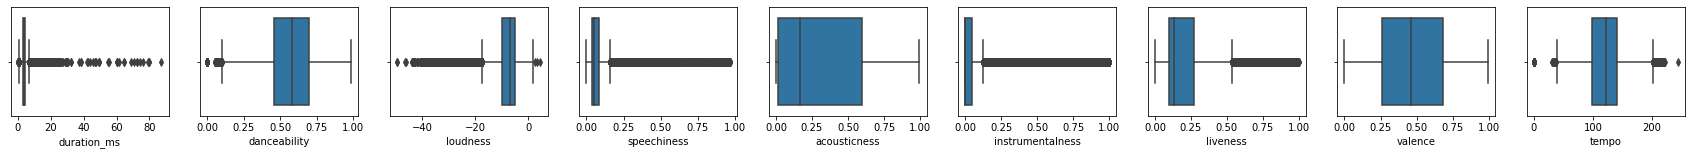

In [32]:
fig, axes= plt.subplots(1, 9, figsize=(30, 2))

sns.boxplot(x=part3ds['duration_ms'],ax=axes[0])
sns.boxplot(x=part3ds['danceability'],ax=axes[1])
sns.boxplot(x=part3ds['loudness'],ax=axes[2])
sns.boxplot(x=part3ds['speechiness'],ax=axes[3])
sns.boxplot(x=part3ds['acousticness'],ax=axes[4])
sns.boxplot(x=part3ds['instrumentalness'],ax=axes[5])
sns.boxplot(x=part3ds['liveness'],ax=axes[6])
sns.boxplot(x=part3ds['valence'],ax=axes[7])
sns.boxplot(x=part3ds['tempo'],ax=axes[8])
plt.show()


Vemos que algunas características del dataset presentan gran cantidad de outliers. Por lo que vamos a imputar los outliers con el valor de la media.

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer #libreria scikit learn

indexes  = part3ds.sum().index
indexes
 
def replaceOutliers(df,col):
    Q3 = np.quantile(df[col], 0.75)


    Q1 = np.quantile(df[col], 0.25)

    
    IQR = Q3 - Q1 #rango intercuartilico

 
    lower_range = Q1 - 1.5 * IQR


    upper_range = Q3 + 1.5 * IQR


    mean = df[col].mean()

    df[col] = np.where(df[col]>Q3,Q3,df[col])
    df[col] = np.where(df[col]<Q1,Q1,df[col])

    return df

for index in indexes:
  replaceOutliers(part3ds,index)

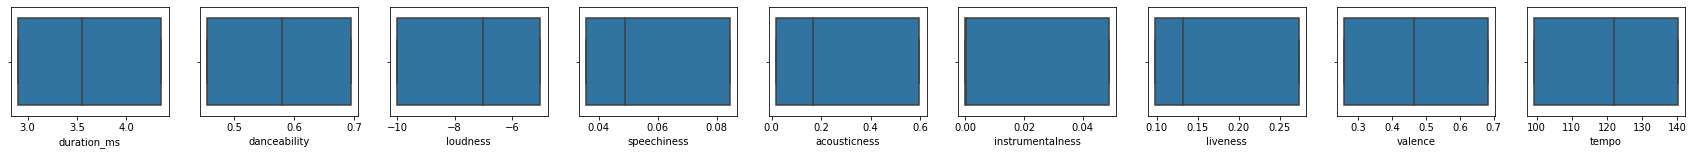

In [34]:
fig, axes= plt.subplots(1, 9, figsize=(30, 2))
sns.boxplot(x=part3ds['duration_ms'],ax=axes[0])
sns.boxplot(x=part3ds['danceability'],ax=axes[1])
sns.boxplot(x=part3ds['loudness'],ax=axes[2])
sns.boxplot(x=part3ds['speechiness'],ax=axes[3])
sns.boxplot(x=part3ds['acousticness'],ax=axes[4])
sns.boxplot(x=part3ds['instrumentalness'],ax=axes[5])
sns.boxplot(x=part3ds['liveness'],ax=axes[6])
sns.boxplot(x=part3ds['valence'],ax=axes[7])
sns.boxplot(x=part3ds['tempo'],ax=axes[8])
plt.show()

In [35]:
part3ds=spotify.drop(['popularity','valoracion','track_genre_cat','track_name','album_name','artists','track_id','time_signature','mode','explicit','is_popular'],axis='columns')
part3ds=pd.get_dummies(part3ds,drop_first=True)

## ENTRENAMIENTO

In [36]:
from sklearn.tree import DecisionTreeClassifier  #arbol de decision
from sklearn import tree #arbol de decision
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics 

part3ds['is_popular']=spotify['is_popular']
part3ds

X = part3ds.drop('is_popular',axis= 1)
y = part3ds['is_popular']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=123)

clf = DecisionTreeClassifier(random_state=435,
                             max_depth=3) #maxima cantidad de niveles

clf.fit(X_train, y_train) #entrenamiento

y_pred = clf.predict(X_test) #generando predicciones

y_pred

array([False, False, False, ..., False, False, False])

In [37]:
def accuracy_manual(y_test,y_pred):
  posicion=0
  valores_iguales=0

  while posicion<len(y_test):
    if y_test[posicion]==y_pred[posicion]:
      valores_iguales+=1
    posicion+=1

  return valores_iguales

numero_predicciones_correctas=accuracy_manual(y_test.values, y_pred)

numero_total_predicciones=len(y_test)

accuracy_score_arbol= numero_predicciones_correctas/numero_total_predicciones

print("Accuracy:",accuracy_score_arbol)

Accuracy: 0.7652631578947369


##CONCLUSIÓN

El resultado del modelo es aceptable. Pero creemos que podemos mejorar su rendimiento un poco más

##EVALUACIÓN

In [38]:
k_folds = KFold(n_splits = 5) #le decimos que queremos 5 subconjuntos diferentes

scores = cross_val_score(clf, X, y, cv = k_folds,scoring='accuracy') #metrica que va a calcular es accuracy

print("Accuracy para cada subconjunto: ", scores)

print("Accuracy promedio: ", scores.mean())

Accuracy para cada subconjunto:  [0.77131579 0.73710526 0.77412281 0.70723684 0.79223684]
Accuracy promedio:  0.7564035087719299


In [39]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy 

0.7652631578947369

In [40]:
precision = metrics.precision_score(y_test, y_pred)
precision

0.8047945205479452

In [41]:
recall_sensibilidad = metrics.recall_score(y_test, y_pred)
recall_sensibilidad

0.0823405746320953

In [57]:
# plt.figure(figsize=(10,6))
# metrics.plot_confusion_matrix(clf, X_test, y_test, display_labels=['Negative', 'Positive'])
# plt.title('MATRIZ DE CONFUSIÓN ')

AttributeError: ignored

<Figure size 720x432 with 0 Axes>

Vemos que hay un error en la matriz de confusión. El modelo solo está prediciendo que la canción no será popular.